In [178]:
#import prettymaps
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import osmnx as ox
from matplotlib import font_manager
#font_manager.findSystemFonts(fontpaths=None, fontext='ttf')

## OSMNX

### Get OSM data

In [280]:
#point = (51.48828137025743, 0.11967287731410758)
point = (51.49030985071205, 0.1145798936339546)
dist = 500
tags = {"building": True}
buildings = ox.features_from_point(point, tags, dist=dist)
roads = ox.graph_from_point(point,dist=dist+5, network_type='drive', truncate_by_edge=True)

### Get Tree data

In [244]:
#load data
df = pd.read_csv("Borough_tree_list_2021July.csv", low_memory=False)
df=df[df["borough"]=="Greenwich"]

#convert to geo dataframe
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude), crs="EPSG:4326")

### Visualise

In [292]:
#configuration
title_font = font_manager.FontProperties(fname='C:\\WINDOWS\\Fonts\\NotoSansTC-Medium.otf')
subtitle_font = font_manager.FontProperties(fname='C:\\Windows\\Fonts\\NotoSansTC-Light.otf')
label_font = font_manager.FontProperties(fname='C:\\Windows\\Fonts\\NotoSansTC-Regular.otf')
colors = {"fc": "#101010", "roads":"#444444", "buildings":"#222222", "title":"#efefef",
          "Apple":"#E7C952", "Cherry":"#FC899B", "Maple":"#A0C059", 'Other': "#238F90"}

#boundaries
west, south, east, north = buildings.union_all().bounds
margin = 0.06
margin_ns = (north - south) * margin
margin_ew = (east - west) * margin

C:\Users\lisa.hornung\AppData\Local\Temp\ipykernel_13300\970265687.py:33: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig("trees-of-abbey-wood.png", dpi=300, bbox_inches="tight", pad_inches=1)
c:\Users\lisa.hornung\anaconda3\envs\ox_v2\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


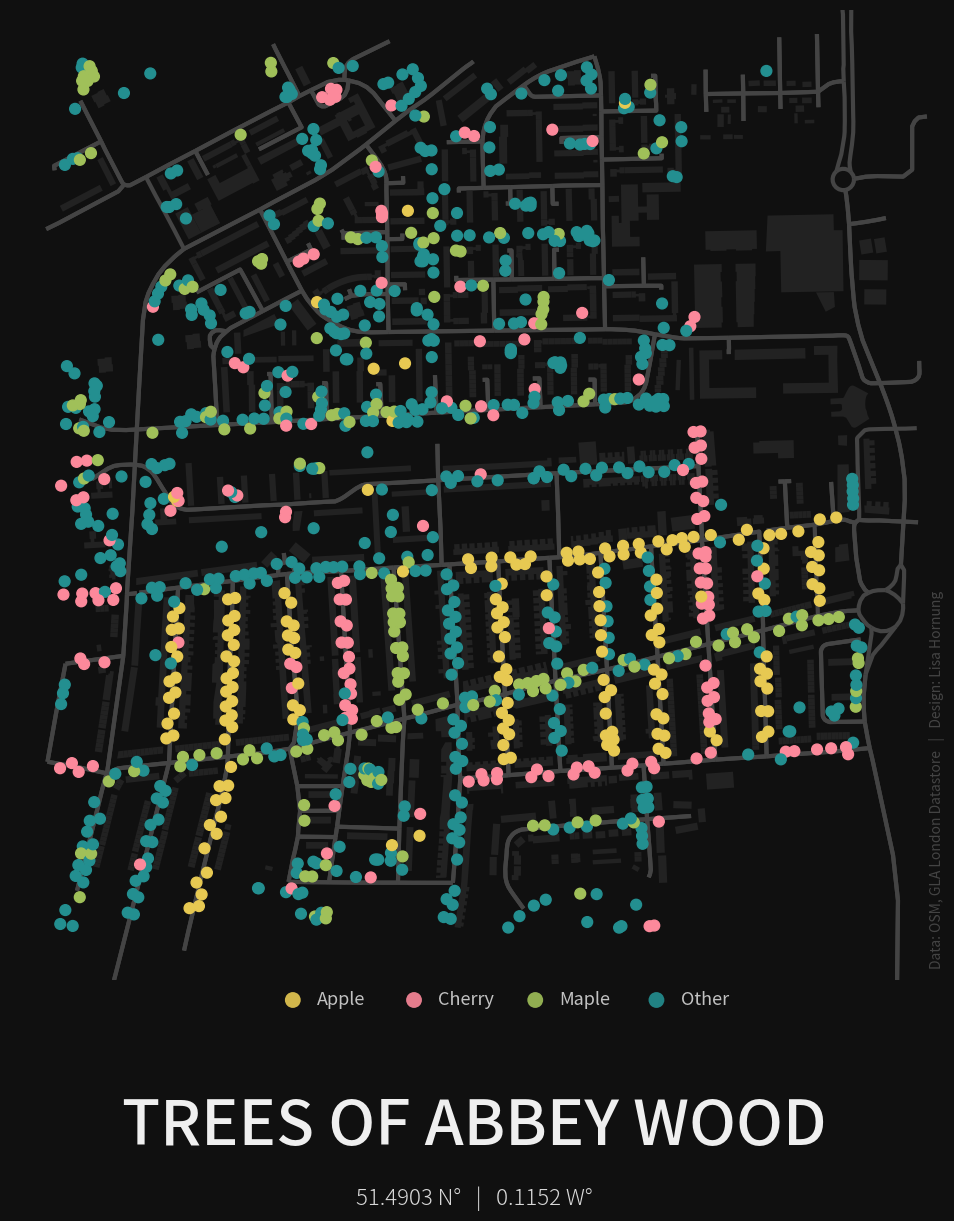

In [306]:
#setup----------------------------
fig, ax = plt.subplots(figsize=(10,10), layout="tight")
fig.set_facecolor(colors["fc"])
ax.set_facecolor(colors["fc"])

#plot roads, buildings and trees ----------------------------
ox.plot_graph(roads, ax=ax, node_size=0, edge_color=colors["roads"], edge_linewidth=3, bbox = (north*0.3, south*0.3,west*0.3,east*0.3),
              show=False, close=False)
buildings.plot(ax=ax, color=colors["buildings"],lw=0, alpha=1)
gdf_filtered = gdf.cx[east:west, south:north]
gdf_filtered.plot(ax=ax, color=gdf_filtered["gla_tree_name"].map(colors).fillna(colors["Other"]),markersize=60, alpha=1)

#axes extent ----------------------------
ax.set_ylim((south - margin_ns, north + margin_ns))
ax.set_xlim((west - margin_ew, east + margin_ew))
ax.set_xlim((west - margin_ew, east + margin_ew))

#legend ----------------------------
lg = fig.add_axes([0.3,-0.03,0.4,0.05])
kw = dict(marker='o', s=130, alpha=0.9, linewidths=0)
labels = ["Apple", "Cherry", "Maple",'Other']
lg.scatter(x=[2,3,4,5], y=[0.8]*4,  color=[colors[i] for i in labels], **kw, clip_on=False)
for i, x_pos in enumerate([5,4,3,2][::-1]):
    lg.text(x_pos+0.2, 0.8, labels[i], fontsize=13, ha="left", va="center", fontproperties=label_font, color=colors["title"], alpha=0.8)
lg.axis("off")

#title and footer
plt.figtext(0.5,-0.15,'Trees of Abbey Wood'.upper(), ha="center",fontsize = 45, color=colors["title"], fontproperties=title_font)
plt.figtext(0.5,-0.21,'51.4903 N°   |   0.1152 W°', ha="center",fontsize = 16, color=colors["title"], alpha=0.9, fontproperties=subtitle_font)
plt.figtext(0.97,0.03,'Data: OSM, GLA London Datastore   |   Design: Lisa Hornung',ha="right", fontsize = 10, color=colors["roads"],alpha=1,fontproperties=label_font,rotation=90,)

#save
plt.savefig("trees-of-abbey-wood.png", dpi=300, bbox_inches="tight", pad_inches=1)

plt.show()

## Playground

In [ ]:
# Prepare roads data
u = []
v = []
key = []
data = []
for uu, vv, kkey, ddata in roads.edges(keys=True, data=True): # added ww
    u.append(uu)
    v.append(vv)
    key.append(kkey)
    data.append(ddata)

#define colours and width by road type
roadwidth = []
roadcols = []
for item in data:    
    if "highway" in item.keys():
        if item["highway"] == "primary":
            width = 8
            color = "#ABABAB"
        if item["highway"] == "secondary" or item["highway"] == "tertiary":
            width = 8  
            color = "#ABABAB"
        if item["highway"] == "residential":
            width = 8  
            color = "#ABABAB"
        else:
            width =  0.2
            color = "#ABABAB"
    else:
        width = 0.2
        color = "#888888"
    roadwidth.append(width)
    roadcols.append(color)

In [97]:
# helper funcion to get one-square-mile street networks, building footprints, and plot them

def make_plot(
    #place,
    point,
    dist,
    network_type="drive",
    default_width=4,
    street_widths=None,
):
    
    G = ox.graph.graph_from_point(
        point, dist=dist, network_type=network_type, truncate_by_edge=False
    )
    gdf = ox.features_from_point(point, tags, dist=dist)
    
    fig, ax = ox.plot_figure_ground(
        G=G,
        dist=dist,
        default_width=default_width,
        street_widths=street_widths,
        save=False,
        show=False,
        close=True,
    )
    fig, ax = ox.plot_footprints(
        gdf, ax=ax, show=True, close=True
    )

    return fig

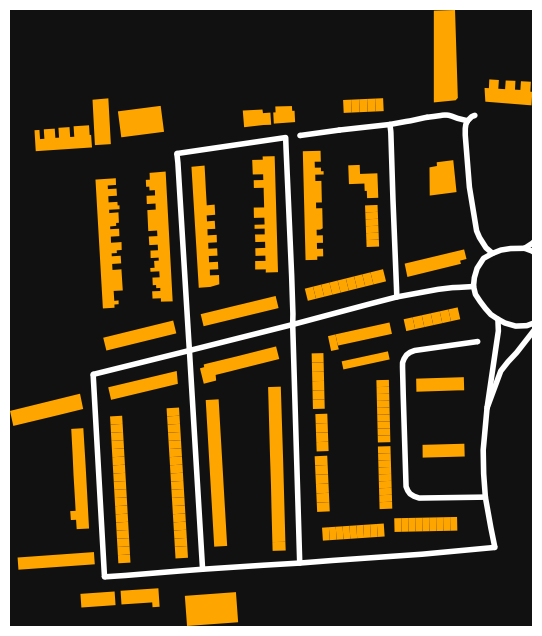

In [101]:
point = (51.48836608641316, 0.12000942736736987)
make_plot(point, dist=170)

### Prettymaps

c:\Users\lisa.hornung\anaconda3\envs\minimal-maps\lib\site-packages\osmnx\geometries.py:358: FutureWarning: You are adding a column named 'geometry' to a GeoDataFrame constructed without an active geometry column. Currently, this automatically sets the active geometry column to 'geometry' but in the future that will no longer happen. Instead, either provide geometry to the GeoDataFrame constructor (GeoDataFrame(... geometry=GeoSeries()) or use `set_geometry('geometry')` to explicitly set the active geometry column.
  gdf["geometry"] = np.nan
c:\Users\lisa.hornung\anaconda3\envs\minimal-maps\lib\site-packages\prettymaps\draw.py:376: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', t

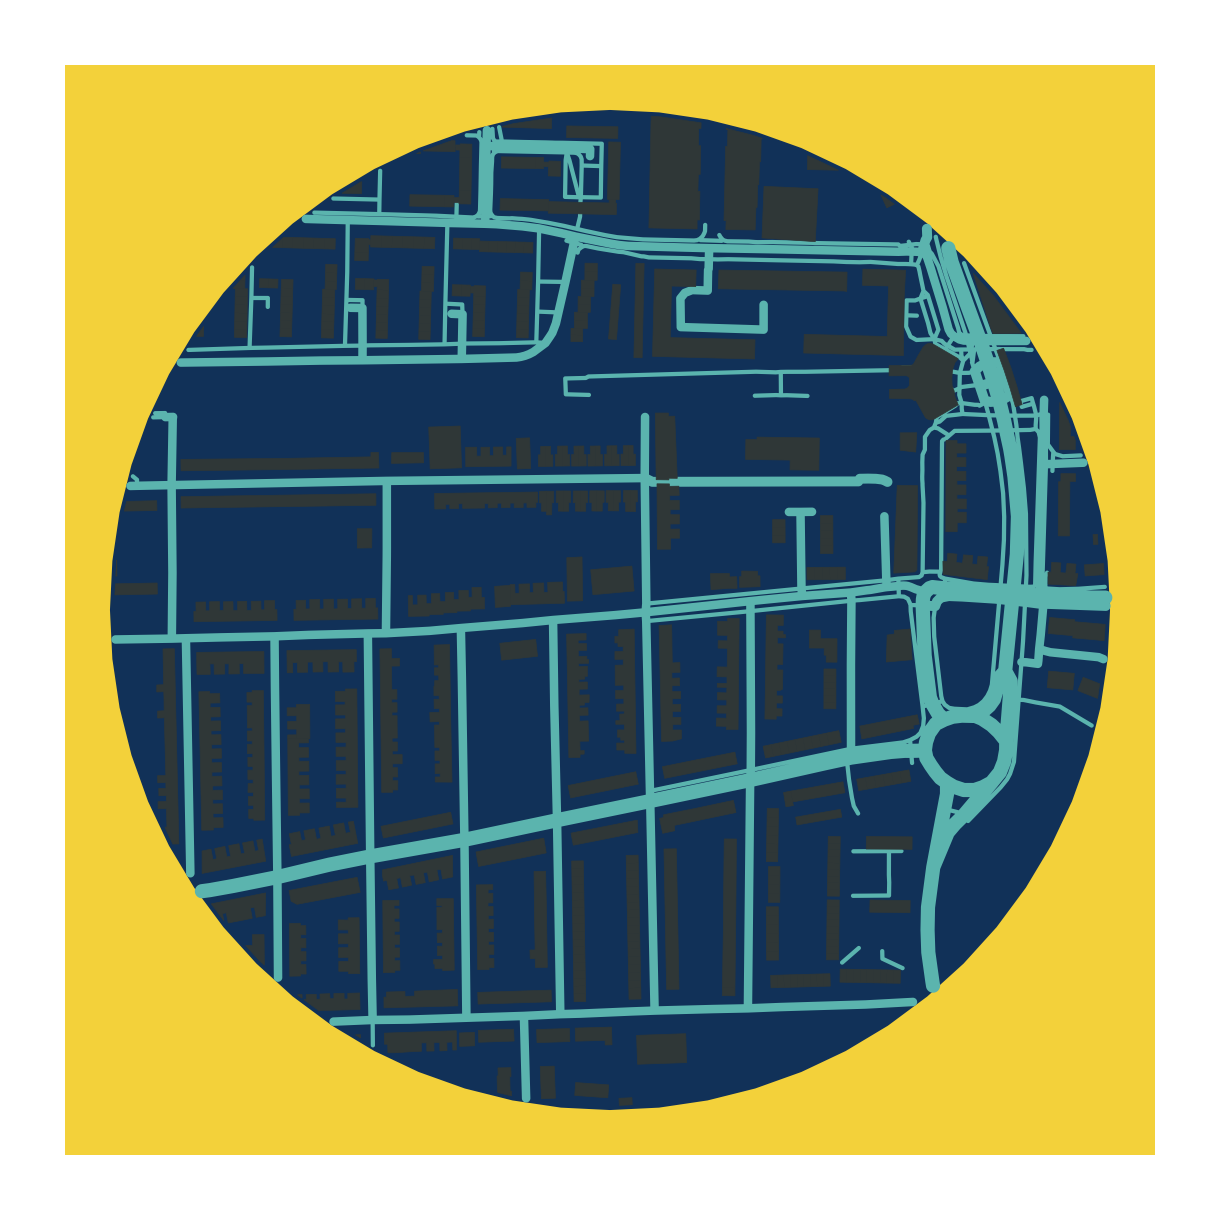

In [6]:
plot = prettymaps.plot(
    #'Cologne, Germany',
    (51.489566046409905, 0.11811704333091211),
    circle=True,
    credit=False,
    radius=350,
    figsize=(12,12),
    #save_as="Cologne.svg",
    layers={
        "water":{
            "tags":{
                "natural":["water", "bay"]
            }
        },
        "streets":{
            "width":{
                "motorway": 5,
                "trunk": 3,
                "primary": 5,
                "secondary": 5,
                "tertiary": 3,
                "residential": 3,
                'service': 0, 
                'unclassified': 0,  
                'pedestrian': 1.5, 
                'footway': 1.5, 
            }
        },
        "building": {
            "tags": {"building": True},
        },
        "green": False,
        "forest": False,
        "parking": False,
        "beach": False
    },
    style={
        "background":{"fc": "#F3D13A", "ec": "#F3D13A", "lw": 0},
        "perimeter":{"fill": True, "fc": "#113158", "ec": "#113158", "lw": 6},
        "water":{"fc": "#11A1DD", "ec": "#2F3737", "hatch_c": "None", "hatch":None, "lw": 0, },
        "streets":{"fc": "#5BB4AE", "ec": "#5BB4AE", "alpha": 1, "lw": 0, },
         "building": {
            "fc": "#2F3737",
            "ec": "#2F3737",
            "lw": 0.5,
        }
    }
)

In [ ]:
custom_styles = {
    "cologne" : { 
        "styles" : {
        "background": {"fc": "#F3D13A", "ec": "#F3D13A", "lw": 0},
        "perimeter": {"fill": True, "fc": "#113158", "ec": "#113158", "lw": 6},
        "water": {"fc": "#11A1DD", "ec": "#2F3737", "hatch_c": "None", "hatch":None, "lw": 0, },
        "streets": {"fc": "#5BB4AE", "ec": "#5BB4AE", "alpha": 1, "lw": 0, },
        'building': {'palette': ['#EEE4E1', '#E7D8C9', '#E6BEAE']}
        },
        "layers" :{
            "water": {
                "tags": {
                    "natural": ["water", "bay"]
                    }
                },
            "streets": {
                "width": {
                    "motorway": 5,
                    "trunk": 3,
                    "primary": 5,   
                    "secondary": 5,
                    "tertiary": 3,
                    "residential": 3,
                    'service': 0, 
                    'unclassified': 3,  
                    'pedestrian': 0, 
                    'footway': 0, 
                    }
                },
            "building": False,
            "green": False,
            "forest": False,
            "parking": False,
            "beach": False
            },
    },
    "berlin" : { 
        "styles" : {
        "background": {"fc": "#65CDD8", "ec": "#65CDD8", "lw": 0},
        "perimeter": {"fill": True, "fc": "#86498E", "ec": "#14355B", "lw": 6},
        "water": {"fc": "#FE568A", "ec": "#2F3737", "hatch_c": "None", "hatch":None, "lw": 0, },
        "streets": {"fc": "#14355B", "ec": "#14355B", "alpha": 1, "lw": 0, },
        'building': {'palette': ['#EEE4E1', '#E7D8C9', '#E6BEAE']}
        },
        "layers" :{
            "water": {
                "tags": {
                    "natural": ["water", "bay"]
                    }
                },
            "streets": {
                "width": {
                    "motorway": 5,
                    "trunk": 3,
                    "primary": 5,   
                    "secondary": 5,
                    "tertiary": 3,
                    "residential": 3,
                    'service': 0, 
                    'unclassified': 3,  
                    'pedestrian': 0, 
                    'footway': 0, 
                    }
                },
            "building": False,
            "green": False,
            "forest": False,
            "parking": False,
            "beach": False
            },
    },
    #new_style_here
}